In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Original Data

In [2]:
mnist = keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Data Exploration

In [4]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


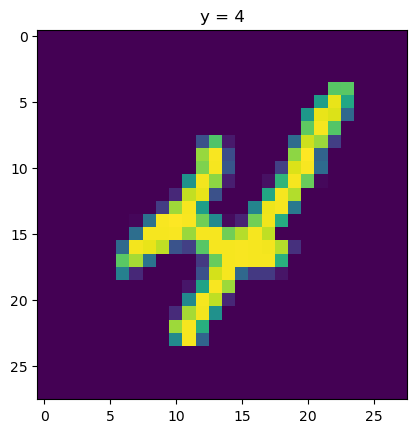

In [5]:
# Display an image from the dataset

index = 9
plt.imshow(X_train[index])
plt.title(f"y = {y_train[index]}")
plt.show()

Data preprocessing

In [6]:
# Reshaping (... x 28 x 28) data into (... x 784)
# 28x28 = 784 neurons

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [7]:
# Convert data into float32 to use 32-bit precision when training

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [8]:
# Normalize data within the range [0,1]

X_train /= 255
X_test /= 255

In [9]:
print(f"X_train.shape: {X_train.shape} & type(X_train): {type(X_train)} & X_train.dtype: {X_train.dtype}")
print(f"X_test.shape: {X_test.shape} & type(X_test): {type(X_test)} & X_test.dtype: {X_train.dtype}")

X_train.shape: (60000, 784) & type(X_train): <class 'numpy.ndarray'> & X_train.dtype: float32
X_test.shape: (10000, 784) & type(X_test): <class 'numpy.ndarray'> & X_test.dtype: float32


In [10]:
# One-Hot Labels

print(f'np.unique(y_train): {np.unique(y_train)}')
print(f'np.unique(y_test): {np.unique(y_test)}')

np.unique(y_train): [0 1 2 3 4 5 6 7 8 9]
np.unique(y_test): [0 1 2 3 4 5 6 7 8 9]


In [11]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Building Models

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

1. Single Layer Perceptron

In [13]:
model_1 = Sequential([
    Dense(10, activation='softmax')
])

In [14]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
training = model_1. fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6040 - accuracy: 0.8476 - val_loss: 0.3524 - val_accuracy: 0.9062
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.9054 - val_loss: 0.3060 - val_accuracy: 0.9158
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3091 - accuracy: 0.9145 - val_loss: 0.2880 - val_accuracy: 0.9203
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2931 - accuracy: 0.9180 - val_loss: 0.2777 - val_accuracy: 0.9235
Epoch 5/10
750/750 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.9205 - val_loss: 0.2726 - val_accuracy: 0.9252
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2764 - accuracy: 0.9226 - val_loss: 0.2689 - val_accuracy: 0.9261
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2714 - accuracy: 0.9240 - val_loss: 0.2660 - val_accuracy: 0.9278
Epoch 

Train-Validation Plot

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


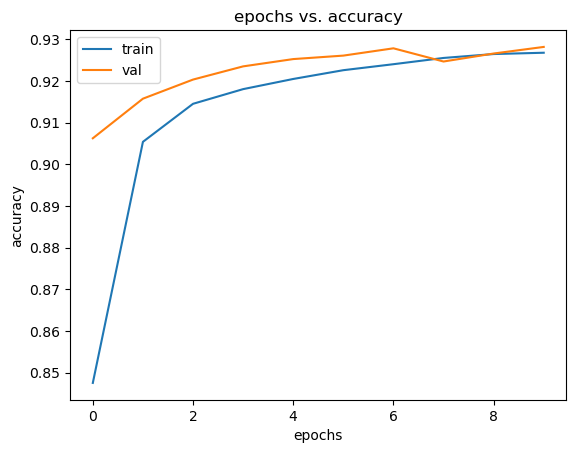

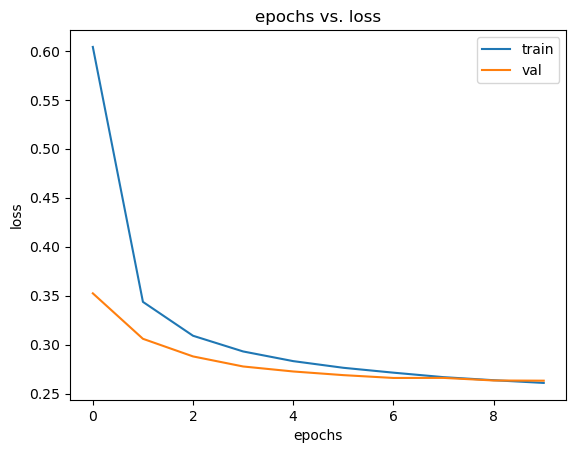

In [16]:
print(training.history.keys())

# Accuracy vs. Epochs

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('epochs vs. accuracy')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Loss vs. Epochs
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('epochs vs. loss')
plt.legend(['train', 'val'], loc='best')
plt.show()

Evaluation

In [17]:
test_loss, test_acc = model_1.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.9261


In [18]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9261000156402588


In [19]:
# Model Architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Model Configuration
model_1.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

2. Multi Layer Perceptron

In [21]:
model_2 = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [22]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
training_2 = model_2.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3520 - accuracy: 0.8981 - val_loss: 0.1949 - val_accuracy: 0.9442
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1609 - accuracy: 0.9525 - val_loss: 0.1385 - val_accuracy: 0.9609
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1153 - accuracy: 0.9651 - val_loss: 0.1228 - val_accuracy: 0.9640
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0900 - accuracy: 0.9726 - val_loss: 0.1095 - val_accuracy: 0.9673
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0731 - accuracy: 0.9774 - val_loss: 0.0986 - val_accuracy: 0.9703
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.1059 - val_accuracy: 0.9665
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.1115 - val_accuracy: 0.9688
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


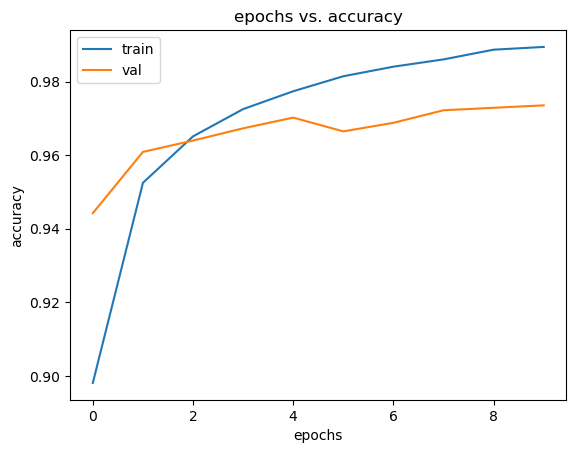

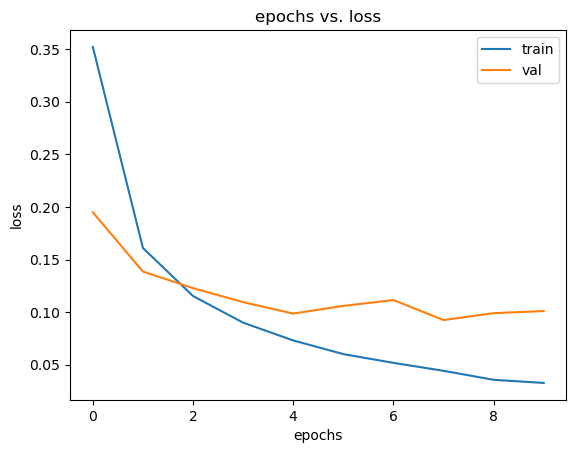

In [24]:
print(training_2.history.keys())

# Accuracy vs. Epochs

plt.plot(training_2.history['accuracy'])
plt.plot(training_2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('epochs vs. accuracy')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Loss vs. Epochs
plt.plot(training_2.history['loss'])
plt.plot(training_2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('epochs vs. loss')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [25]:
test_loss_2, test_acc_2 = model_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9712


In [26]:
print(f'Test accuracy: {test_acc_2}')

Test accuracy: 0.9711999893188477


In [27]:
# Model Architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Model Configuration
model_2.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_1_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros'

3. Model to avoid overfitting

(Adding Dropout)

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model_3 = Sequential([
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [31]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
training_3 = model_3.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.6150 - accuracy: 0.8064 - val_loss: 0.1971 - val_accuracy: 0.9423
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3112 - accuracy: 0.9091 - val_loss: 0.1509 - val_accuracy: 0.9555
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2595 - accuracy: 0.9247 - val_loss: 0.1312 - val_accuracy: 0.9611
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2262 - accuracy: 0.9338 - val_loss: 0.1185 - val_accuracy: 0.9650
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2056 - accuracy: 0.9380 - val_loss: 0.1143 - val_accuracy: 0.9673
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1882 - accuracy: 0.9433 - val_loss: 0.1107 - val_accuracy: 0.9671
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1810 - accuracy: 0.9461 - val_loss: 0.1020 - val_accuracy: 0.9684
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


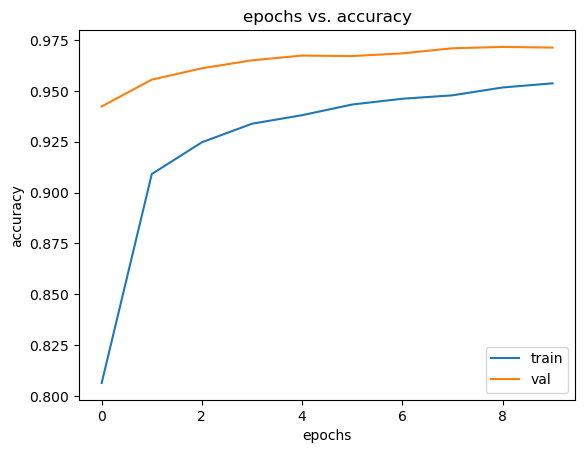

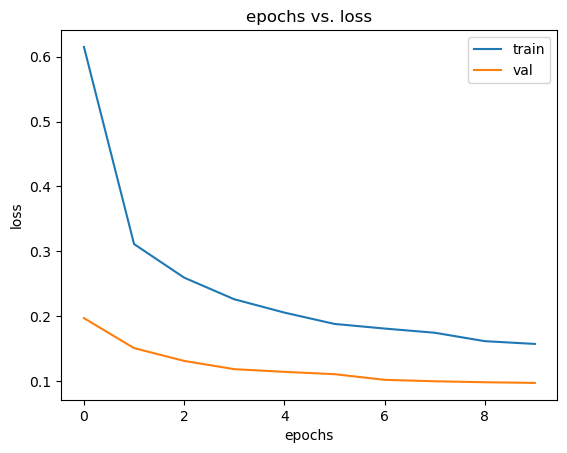

In [33]:
print(training_3.history.keys())

# Accuracy vs. Epochs

plt.plot(training_3.history['accuracy'])
plt.plot(training_3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('epochs vs. accuracy')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Loss vs. Epochs
plt.plot(training_3.history['loss'])
plt.plot(training_3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('epochs vs. loss')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [34]:
test_loss_3, test_acc_3 = model_3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9720


In [35]:
print(f'Test accuracy: {test_acc_3}')

Test accuracy: 0.972000002861023


In [36]:
# Model Architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Model Configuration
model_3.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_4_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.5,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_5',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activat

Testing

1/1 [==============================] - 0s 18ms/step


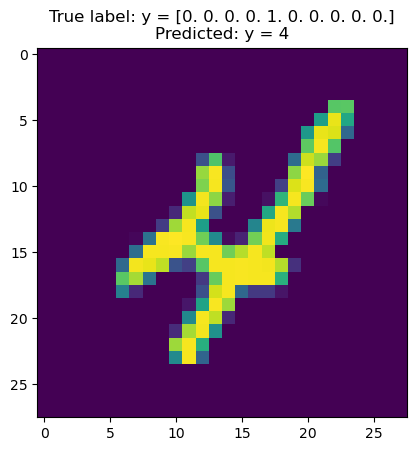

In [53]:
index = 9

# Predict
prediction = model_3.predict(np.expand_dims(X_train[index], axis=0))
predicted_label = np.argmax(prediction, axis=1)[0]  # Assuming the model outputs probabilities for each class

# Compare
plt.imshow(X_train[index].reshape(28, 28))  # Reshape if flattened
plt.title(f"True label: y = {y_train[index]}\nPredicted: y = {predicted_label}")
plt.show()